# Model Buildings And Evaluation

## Importing Libraries

In [33]:
import os
import re
import nltk
import keras
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense, LSTM, Embedding, Dropout
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

import warnings

warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (16,9)
plt.rcParams['figure.dpi'] = 350
sns.set_style(style='darkgrid')
plt.tight_layout()
%matplotlib inline

## Loading Dataset

In [34]:
csv_path = os.path.join(os.path.dirname(os.getcwd()),'Datasets', 'cleaned_spam_data.csv')
spam_dataset = pd.read_csv(csv_path)

spam_dataset

,message,label
0,go jurong point crazy available bugis n great ...,ham
1,ok lar joking wif u oni,ham
2,free entry wkly comp win fa cup final tkts st ...,spam
3,u dun say early hor u c already say,ham
4,nah think go usf life around though,ham
...,...,...
5164,nd time tried contact u u pound prize claim ea...,spam
5165,b going esplanade fr home,ham
5166,pity mood suggestion,ham
5167,guy bitching acted like interested buying some...,ham


### Checking For Null Values

In [35]:
for i in spam_dataset.columns:
    print('\n Column Name :' + str(i))
    print(" Total no of null values : " + str(spam_dataset[i].isna().sum()))


 Column Name :message
 Total no of null values : 7

 Column Name :label
 Total no of null values : 0


In [36]:
spam_dataset.dropna(inplace=True)
spam_dataset.reset_index(drop=True, inplace=True)

In [37]:
for i in spam_dataset.columns:
    print('\n Column Name :' + str(i))
    print(" Total no of null values : " + str(spam_dataset[i].isna().sum()))


 Column Name :message
 Total no of null values : 0

 Column Name :label
 Total no of null values : 0


## Peforming Train Test Split

In [38]:
x = spam_dataset.loc[:,'message']

x.shape

(5162,)

In [39]:
le = LabelEncoder()
y = le.fit_transform(spam_dataset.loc[:,'label'])

y.shape

(5162,)

### Tokenizeing The Data

In [40]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(x)
x = tokenizer.texts_to_sequences(x)
x = pad_sequences(x, maxlen=20, padding='post')

x

array([[   5, 3301,  268, ...,    0,    0,    0],
       [   8,  215, 1157, ...,    0,    0,    0],
       [ 405,  828,  764, ...,  236,   30,  332],
       ...,
       [7121, 1480, 3298, ...,    0,    0,    0],
       [ 128, 7122, 3268, ...,    0,    0,    0],
       [2040,  370,  165, ...,    0,    0,    0]])

In [41]:
len(x)


5162

## Model Building

In [42]:
length_pad = 20
no_of_words = 7982

### Splitting The Data into 70% Test set and 30% train set

In [43]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.3, random_state=42)

### Creating model with 70% Train size and 30% Test size

In [44]:
model = Sequential()
model.add(Embedding(input_dim=no_of_words+1, output_dim=128, input_shape=(length_pad,)))
model.add(LSTM(256, return_sequences=True))
model.add(LSTM(128))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_5 (Embedding)         │ (None, 20, 128)        │     1,021,824 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_10 (LSTM)                  │ (None, 20, 256)        │       394,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_11 (LSTM)                  │ (None, 128)            │       197,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,640,065 (6.26 MB)

 Trainable params: 1,640,065 (6.26 MB)

 Non-trainable params: 0 (0.00 B)

In [45]:
history = model.fit(xtrain, ytrain, epochs=100, batch_size=64, validation_data=(xtest, ytest))

Epoch 1/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 7s 77ms/step - accuracy: 0.7796 - loss: 0.4230 - val_accuracy: 0.9613 - val_loss: 0.1647
Epoch 2/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 4s 79ms/step - accuracy: 0.9772 - loss: 0.0851 - val_accuracy: 0.9819 - val_loss: 0.0700
Epoch 3/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 4s 76ms/step - accuracy: 0.9944 - loss: 0.0288 - val_accuracy: 0.9839 - val_loss: 0.0679
Epoch 4/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 5s 79ms/step - accuracy: 0.9975 - loss: 0.0091 - val_accuracy: 0.9793 - val_loss: 0.0986
Epoch 5/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 4s 78ms/step - accuracy: 0.9975 - loss: 0.0075 - val_accuracy: 0.9787 - val_loss: 0.1280
Epoch 6/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 4s 76ms/step - accuracy: 0.9988 - loss: 0.0065 - val_accuracy: 0.9781 - val_loss: 0.1545
Epoch 7/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 5s 84ms/step - accuracy: 0.9993 - loss: 0.0043 - val_accuracy: 0.9800 - val_loss: 0.0826
Epoch 8/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 5s 87ms/step - accuracy: 0.9983 - loss: 0.0139 - val_accuracy: 0.

### Splitting The Data into 80% Test set and 20% train set

In [46]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)

### Creating Default Model with 80% Train size and 20% Test size

In [47]:
def_model = Sequential()
def_model.add(Embedding(input_dim=no_of_words+1, output_dim=128, input_shape=(length_pad,)))
def_model.add(LSTM(256, return_sequences=True))
def_model.add(LSTM(128))
def_model.add(Dense(128, activation='relu'))
def_model.add(Dense(64, activation='relu'))
def_model.add(Dense(32, activation='relu'))
def_model.add(Dense(1, activation='sigmoid'))

def_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
def_model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_6 (Embedding)         │ (None, 20, 128)        │     1,021,824 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_12 (LSTM)                  │ (None, 20, 256)        │       394,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_13 (LSTM)                  │ (None, 128)            │       197,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,640,065 (6.26 MB)

 Trainable params: 1,640,065 (6.26 MB)

 Non-trainable params: 0 (0.00 B)

In [48]:
def_history = def_model.fit(xtrain, ytrain, epochs=100, batch_size=64, validation_data=(xtest, ytest))

Epoch 1/100
65/65 ━━━━━━━━━━━━━━━━━━━━ 7s 70ms/step - accuracy: 0.8982 - loss: 0.3340 - val_accuracy: 0.9700 - val_loss: 0.0992
Epoch 2/100
65/65 ━━━━━━━━━━━━━━━━━━━━ 4s 64ms/step - accuracy: 0.9879 - loss: 0.0494 - val_accuracy: 0.9826 - val_loss: 0.0803
Epoch 3/100
65/65 ━━━━━━━━━━━━━━━━━━━━ 4s 64ms/step - accuracy: 0.9966 - loss: 0.0161 - val_accuracy: 0.9797 - val_loss: 0.0692
Epoch 4/100
65/65 ━━━━━━━━━━━━━━━━━━━━ 4s 64ms/step - accuracy: 0.9981 - loss: 0.0101 - val_accuracy: 0.9768 - val_loss: 0.1083
Epoch 5/100
65/65 ━━━━━━━━━━━━━━━━━━━━ 5s 71ms/step - accuracy: 0.9979 - loss: 0.0127 - val_accuracy: 0.9768 - val_loss: 0.1460
Epoch 6/100
65/65 ━━━━━━━━━━━━━━━━━━━━ 4s 64ms/step - accuracy: 0.9985 - loss: 0.0046 - val_accuracy: 0.9777 - val_loss: 0.1469
Epoch 7/100
65/65 ━━━━━━━━━━━━━━━━━━━━ 4s 64ms/step - accuracy: 0.9976 - loss: 0.0057 - val_accuracy: 0.9719 - val_loss: 0.1762
Epoch 8/100
65/65 ━━━━━━━━━━━━━━━━━━━━ 4s 64ms/step - accuracy: 0.9979 - loss: 0.0150 - val_accuracy: 0.

In [49]:
def_model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_6 (Embedding)         │ (None, 20, 128)        │     1,021,824 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_12 (LSTM)                  │ (None, 20, 256)        │       394,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_13 (LSTM)                  │ (None, 128)            │       197,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,920,197 (18.77 MB)

 Trainable params: 1,640,065 (6.26 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 3,280,132 (12.51 MB)

### Creating Model With Early Stopping with 20% Test size

In [50]:
early = EarlyStopping(monitor='val_loss',mode='min', patience=20)

In [51]:
es_model = Sequential()
es_model.add(Embedding(input_dim=no_of_words+1, output_dim=128, input_shape=(length_pad,)))
es_model.add(LSTM(256, return_sequences=True))
es_model.add(LSTM(128))
es_model.add(Dense(128, activation='relu'))
es_model.add(Dense(64, activation='relu'))
es_model.add(Dense(32, activation='relu'))
es_model.add(Dense(1, activation='sigmoid'))

es_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [52]:
es_history = es_model.fit(xtrain, ytrain, epochs=1000, batch_size=64, validation_data=(xtest, ytest), callbacks=[early])

Epoch 1/1000
65/65 ━━━━━━━━━━━━━━━━━━━━ 8s 72ms/step - accuracy: 0.8473 - loss: 0.3480 - val_accuracy: 0.9768 - val_loss: 0.0885
Epoch 2/1000
65/65 ━━━━━━━━━━━━━━━━━━━━ 4s 67ms/step - accuracy: 0.9898 - loss: 0.0417 - val_accuracy: 0.9768 - val_loss: 0.1104
Epoch 3/1000
65/65 ━━━━━━━━━━━━━━━━━━━━ 4s 66ms/step - accuracy: 0.9937 - loss: 0.0361 - val_accuracy: 0.9768 - val_loss: 0.1088
Epoch 4/1000
65/65 ━━━━━━━━━━━━━━━━━━━━ 4s 65ms/step - accuracy: 0.9967 - loss: 0.0185 - val_accuracy: 0.9797 - val_loss: 0.0954
Epoch 5/1000
65/65 ━━━━━━━━━━━━━━━━━━━━ 4s 67ms/step - accuracy: 0.9988 - loss: 0.0078 - val_accuracy: 0.9835 - val_loss: 0.1004
Epoch 6/1000
65/65 ━━━━━━━━━━━━━━━━━━━━ 5s 73ms/step - accuracy: 0.9989 - loss: 0.0047 - val_accuracy: 0.9777 - val_loss: 0.1399
Epoch 7/1000
65/65 ━━━━━━━━━━━━━━━━━━━━ 4s 67ms/step - accuracy: 0.9988 - loss: 0.0048 - val_accuracy: 0.9826 - val_loss: 0.1118
Epoch 8/1000
65/65 ━━━━━━━━━━━━━━━━━━━━ 4s 67ms/step - accuracy: 0.9990 - loss: 0.0025 - val_accu

In [53]:
es_model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_7 (Embedding)         │ (None, 20, 128)        │     1,021,824 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_14 (LSTM)                  │ (None, 20, 256)        │       394,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_15 (LSTM)                  │ (None, 128)            │       197,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,920,197 (18.77 MB)

 Trainable params: 1,640,065 (6.26 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 3,280,132 (12.51 MB)

### Creating Model With Drop Out Layer with 20% Test size

In [54]:
dol_model = Sequential()
dol_model.add(Embedding(input_dim=no_of_words+1, output_dim=128, input_shape=(length_pad,)))
dol_model.add(LSTM(400, dropout=0.2, recurrent_dropout=0.2, return_sequences=True))
dol_model.add(LSTM(200, dropout=0.2, recurrent_dropout=0.2))
dol_model.add(Dropout(rate=0.5))
dol_model.add(Dense(128, activation='relu'))
dol_model.add(Dropout(rate=0.5))
dol_model.add(Dense(64, activation='relu'))
dol_model.add(Dropout(rate=0.5))
dol_model.add(Dense(1, activation='sigmoid'))

dol_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [55]:
dol_history = dol_model.fit(xtrain, ytrain, epochs=100, batch_size=64, validation_data=(xtest, ytest))

Epoch 1/100
65/65 ━━━━━━━━━━━━━━━━━━━━ 10s 121ms/step - accuracy: 0.8320 - loss: 0.3637 - val_accuracy: 0.9739 - val_loss: 0.0797
Epoch 2/100
65/65 ━━━━━━━━━━━━━━━━━━━━ 7s 109ms/step - accuracy: 0.9885 - loss: 0.0562 - val_accuracy: 0.9719 - val_loss: 0.1122
Epoch 3/100
65/65 ━━━━━━━━━━━━━━━━━━━━ 7s 108ms/step - accuracy: 0.9954 - loss: 0.0319 - val_accuracy: 0.9729 - val_loss: 0.1512
Epoch 4/100
65/65 ━━━━━━━━━━━━━━━━━━━━ 7s 106ms/step - accuracy: 0.9963 - loss: 0.0172 - val_accuracy: 0.9787 - val_loss: 0.1619
Epoch 5/100
65/65 ━━━━━━━━━━━━━━━━━━━━ 7s 107ms/step - accuracy: 0.9975 - loss: 0.0152 - val_accuracy: 0.9710 - val_loss: 0.2406
Epoch 6/100
65/65 ━━━━━━━━━━━━━━━━━━━━ 7s 106ms/step - accuracy: 0.9994 - loss: 0.0046 - val_accuracy: 0.9681 - val_loss: 0.2758
Epoch 7/100
65/65 ━━━━━━━━━━━━━━━━━━━━ 7s 115ms/step - accuracy: 0.9989 - loss: 0.0071 - val_accuracy: 0.9661 - val_loss: 0.4157
Epoch 8/100
65/65 ━━━━━━━━━━━━━━━━━━━━ 7s 106ms/step - accuracy: 0.9962 - loss: 0.0280 - val_acc

In [56]:
dol_model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_8 (Embedding)         │ (None, 20, 128)        │     1,021,824 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_16 (LSTM)                  │ (None, 20, 400)        │       846,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_17 (LSTM)                  │ (None, 200)            │       480,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 200)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ (None, 128)            │        25,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,149,221 (27.27 MB)

 Trainable params: 2,383,073 (9.09 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 4,766,148 (18.18 MB)

### Creating Model With Drop Out Layer & Early Stopping with 20% Test size

In [57]:
es_dol_model = Sequential()
es_dol_model.add(Embedding(input_dim=no_of_words+1, output_dim=128, input_shape=(length_pad,)))
es_dol_model.add(LSTM(400, dropout=0.2, recurrent_dropout=0.2, return_sequences=True))
es_dol_model.add(LSTM(200, dropout=0.2, recurrent_dropout=0.2))
es_dol_model.add(Dropout(rate=0.5))
es_dol_model.add(Dense(128, activation='relu'))
es_dol_model.add(Dropout(rate=0.5))
es_dol_model.add(Dense(64, activation='relu'))
es_dol_model.add(Dropout(rate=0.5))
es_dol_model.add(Dense(1, activation='sigmoid'))

es_dol_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
es_dol_model.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_9 (Embedding)         │ (None, 20, 128)        │     1,021,824 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_18 (LSTM)                  │ (None, 20, 400)        │       846,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_19 (LSTM)                  │ (None, 200)            │       480,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 200)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_33 (Dense)                │ (None, 128)            │        25,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_34 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_35 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,383,073 (9.09 MB)

 Trainable params: 2,383,073 (9.09 MB)

 Non-trainable params: 0 (0.00 B)

In [58]:
es_dol_history = es_dol_model.fit(xtrain, ytrain, epochs=1000, batch_size=64, validation_data=(xtest, ytest), callbacks=[early])

Epoch 1/1000
65/65 ━━━━━━━━━━━━━━━━━━━━ 11s 122ms/step - accuracy: 0.8773 - loss: 0.3385 - val_accuracy: 0.9739 - val_loss: 0.0965
Epoch 2/1000
65/65 ━━━━━━━━━━━━━━━━━━━━ 7s 108ms/step - accuracy: 0.9840 - loss: 0.0668 - val_accuracy: 0.9787 - val_loss: 0.1100
Epoch 3/1000
65/65 ━━━━━━━━━━━━━━━━━━━━ 7s 109ms/step - accuracy: 0.9968 - loss: 0.0221 - val_accuracy: 0.9729 - val_loss: 0.1314
Epoch 4/1000
65/65 ━━━━━━━━━━━━━━━━━━━━ 7s 112ms/step - accuracy: 0.9978 - loss: 0.0131 - val_accuracy: 0.9652 - val_loss: 0.2204
Epoch 5/1000
65/65 ━━━━━━━━━━━━━━━━━━━━ 7s 111ms/step - accuracy: 0.9919 - loss: 0.0340 - val_accuracy: 0.9274 - val_loss: 0.3468
Epoch 6/1000
65/65 ━━━━━━━━━━━━━━━━━━━━ 7s 114ms/step - accuracy: 0.9818 - loss: 0.0591 - val_accuracy: 0.9652 - val_loss: 0.1983
Epoch 7/1000
65/65 ━━━━━━━━━━━━━━━━━━━━ 7s 110ms/step - accuracy: 0.9938 - loss: 0.0267 - val_accuracy: 0.9632 - val_loss: 0.1469
Epoch 8/1000
65/65 ━━━━━━━━━━━━━━━━━━━━ 7s 107ms/step - accuracy: 0.9935 - loss: 0.0267 -

In [59]:
es_dol_model.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_9 (Embedding)         │ (None, 20, 128)        │     1,021,824 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_18 (LSTM)                  │ (None, 20, 400)        │       846,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_19 (LSTM)                  │ (None, 200)            │       480,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 200)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_33 (Dense)                │ (None, 128)            │        25,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_34 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_35 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,149,221 (27.27 MB)

 Trainable params: 2,383,073 (9.09 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 4,766,148 (18.18 MB)

## Model Evaluation

33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Evaluating  Model with 30% Test size :-
Model Accuracy   :  0.97
Model precision  :  0.91
Model recall     :  0.88
Model f1_score   :  0.9
Printing Confusion Matrix :
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       899
           1       0.91      0.88      0.90       134

    accuracy                           0.97      1033
   macro avg       0.95      0.93      0.94      1033
weighted avg       0.97      0.97      0.97      1033
 

Printing Confusion Matrix :
[[888  11]
 [ 16 118]]


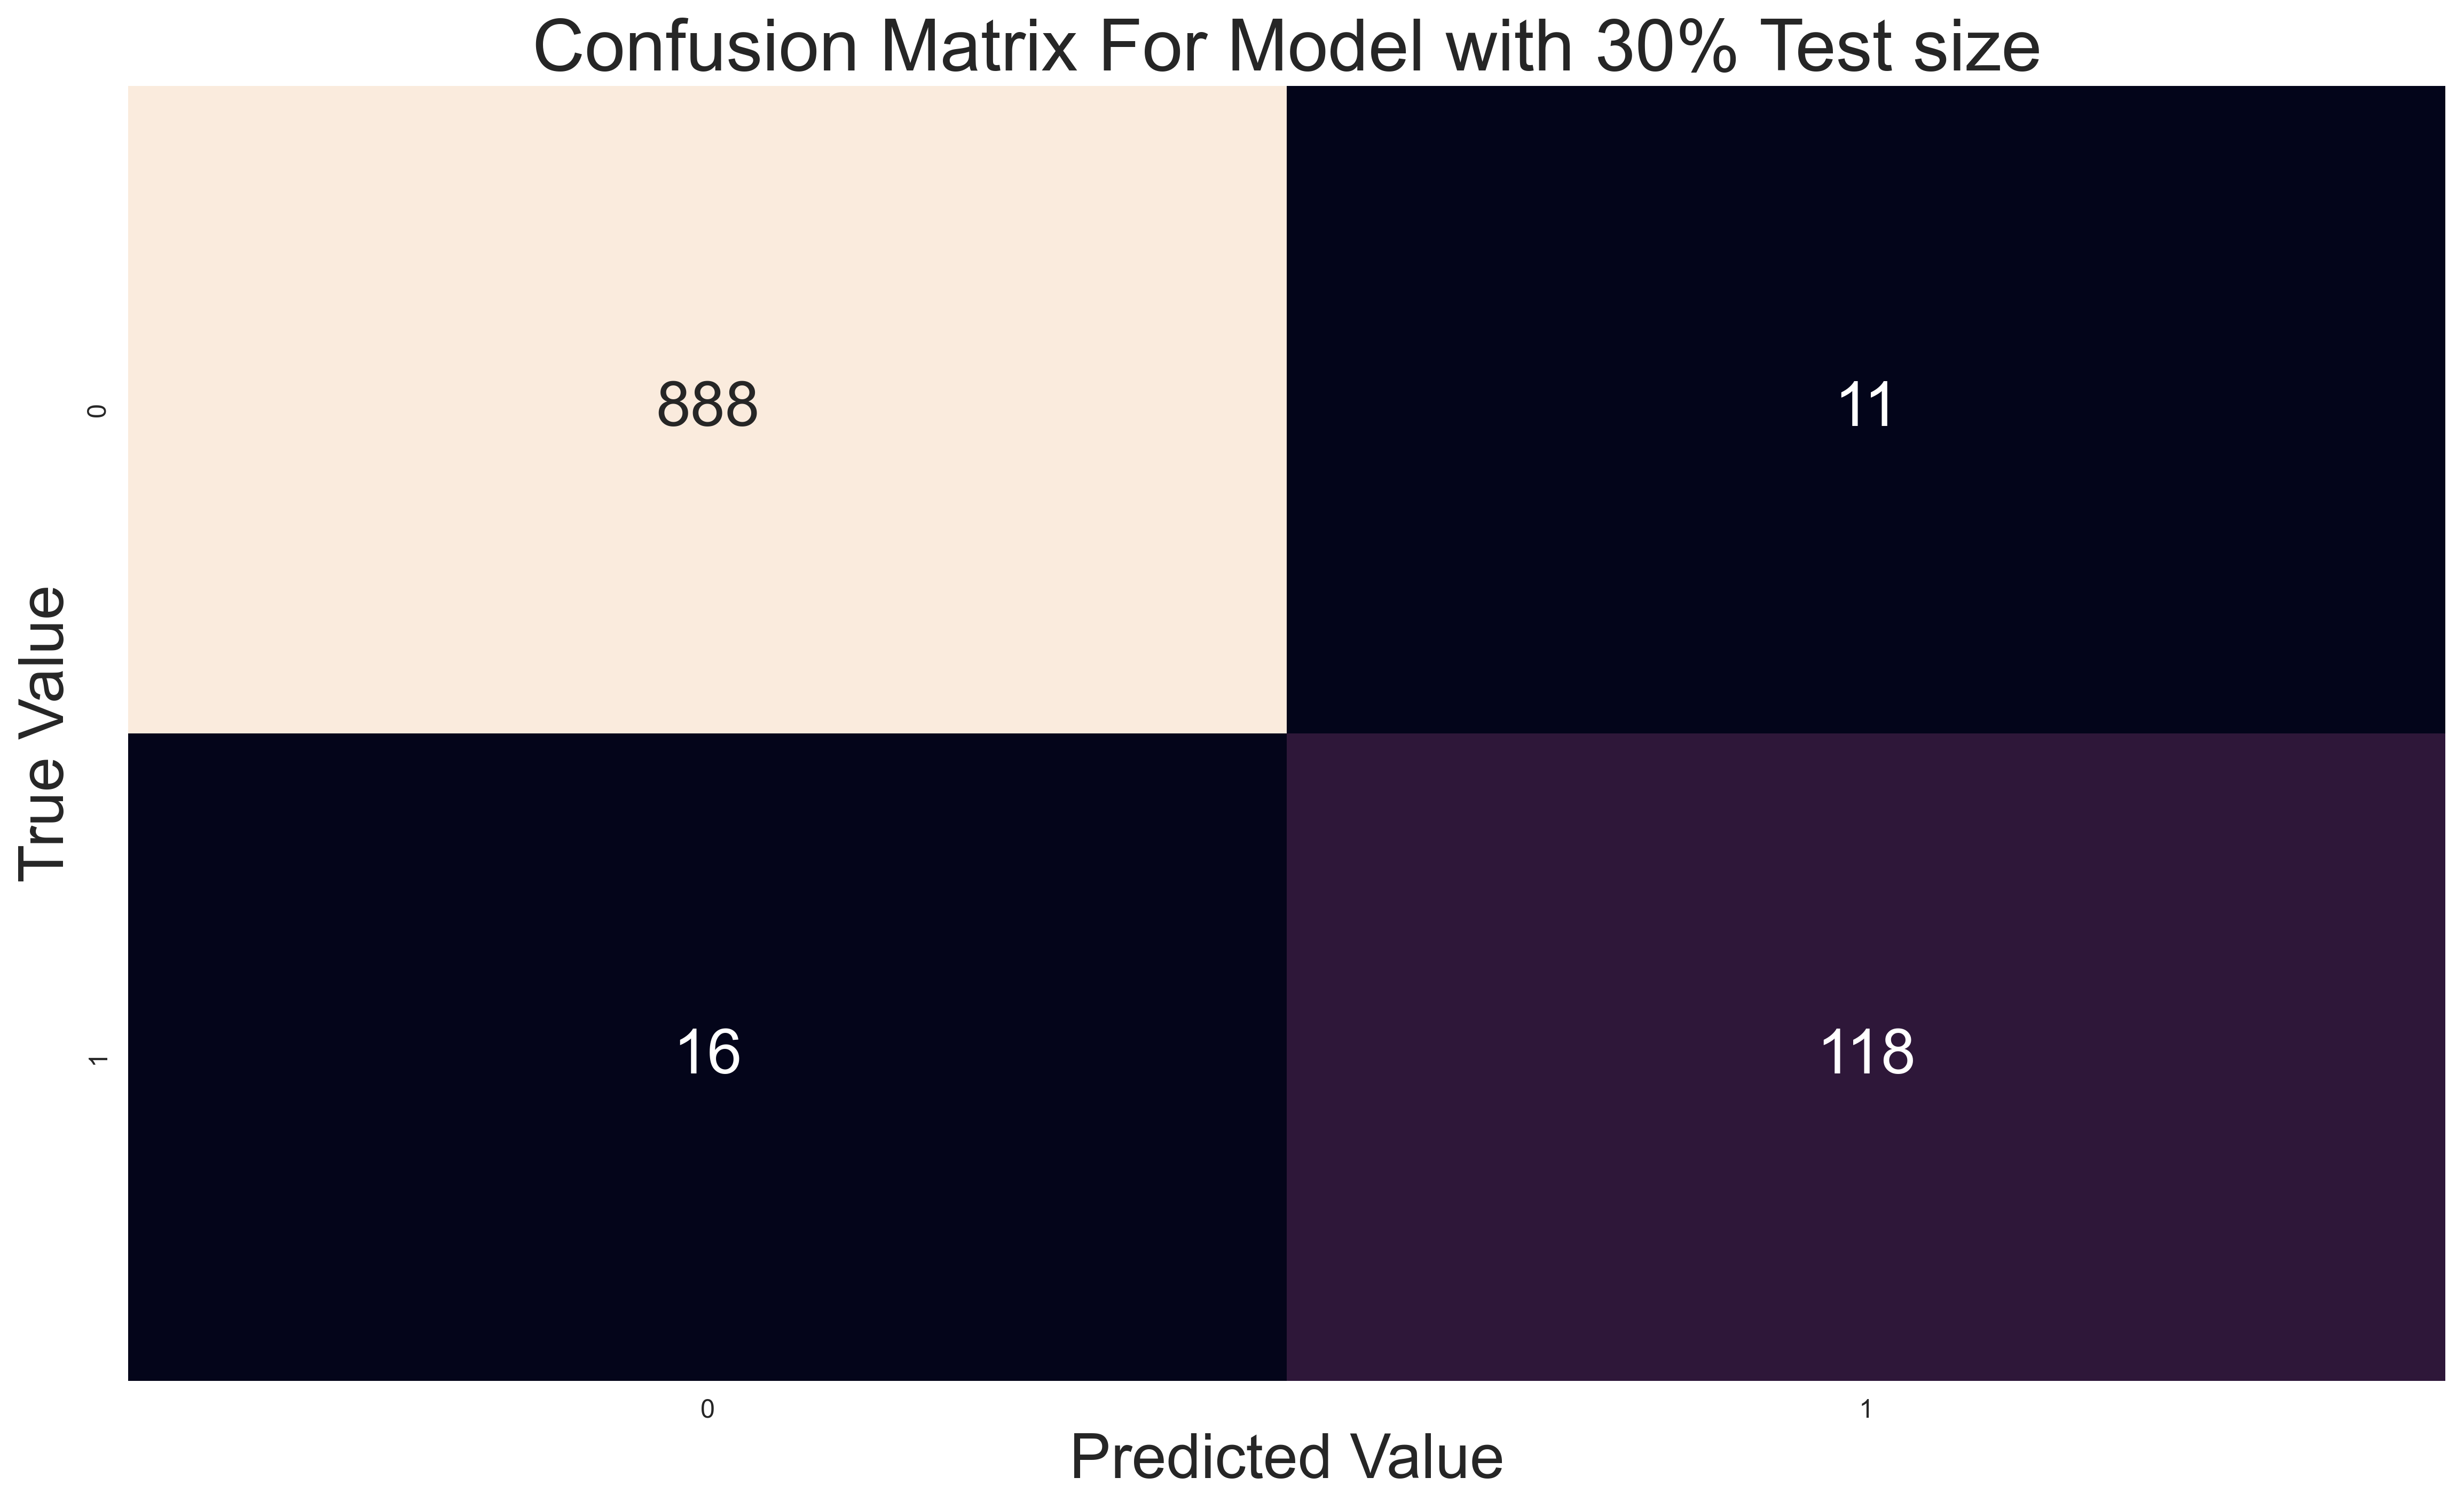

33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step
Evaluating  Model with 20% Test size :-
Model Accuracy   :  0.98
Model precision  :  0.93
Model recall     :  0.91
Model f1_score   :  0.92
Printing Confusion Matrix :
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       899
           1       0.93      0.91      0.92       134

    accuracy                           0.98      1033
   macro avg       0.96      0.95      0.95      1033
weighted avg       0.98      0.98      0.98      1033
 

Printing Confusion Matrix :
[[890   9]
 [ 12 122]]


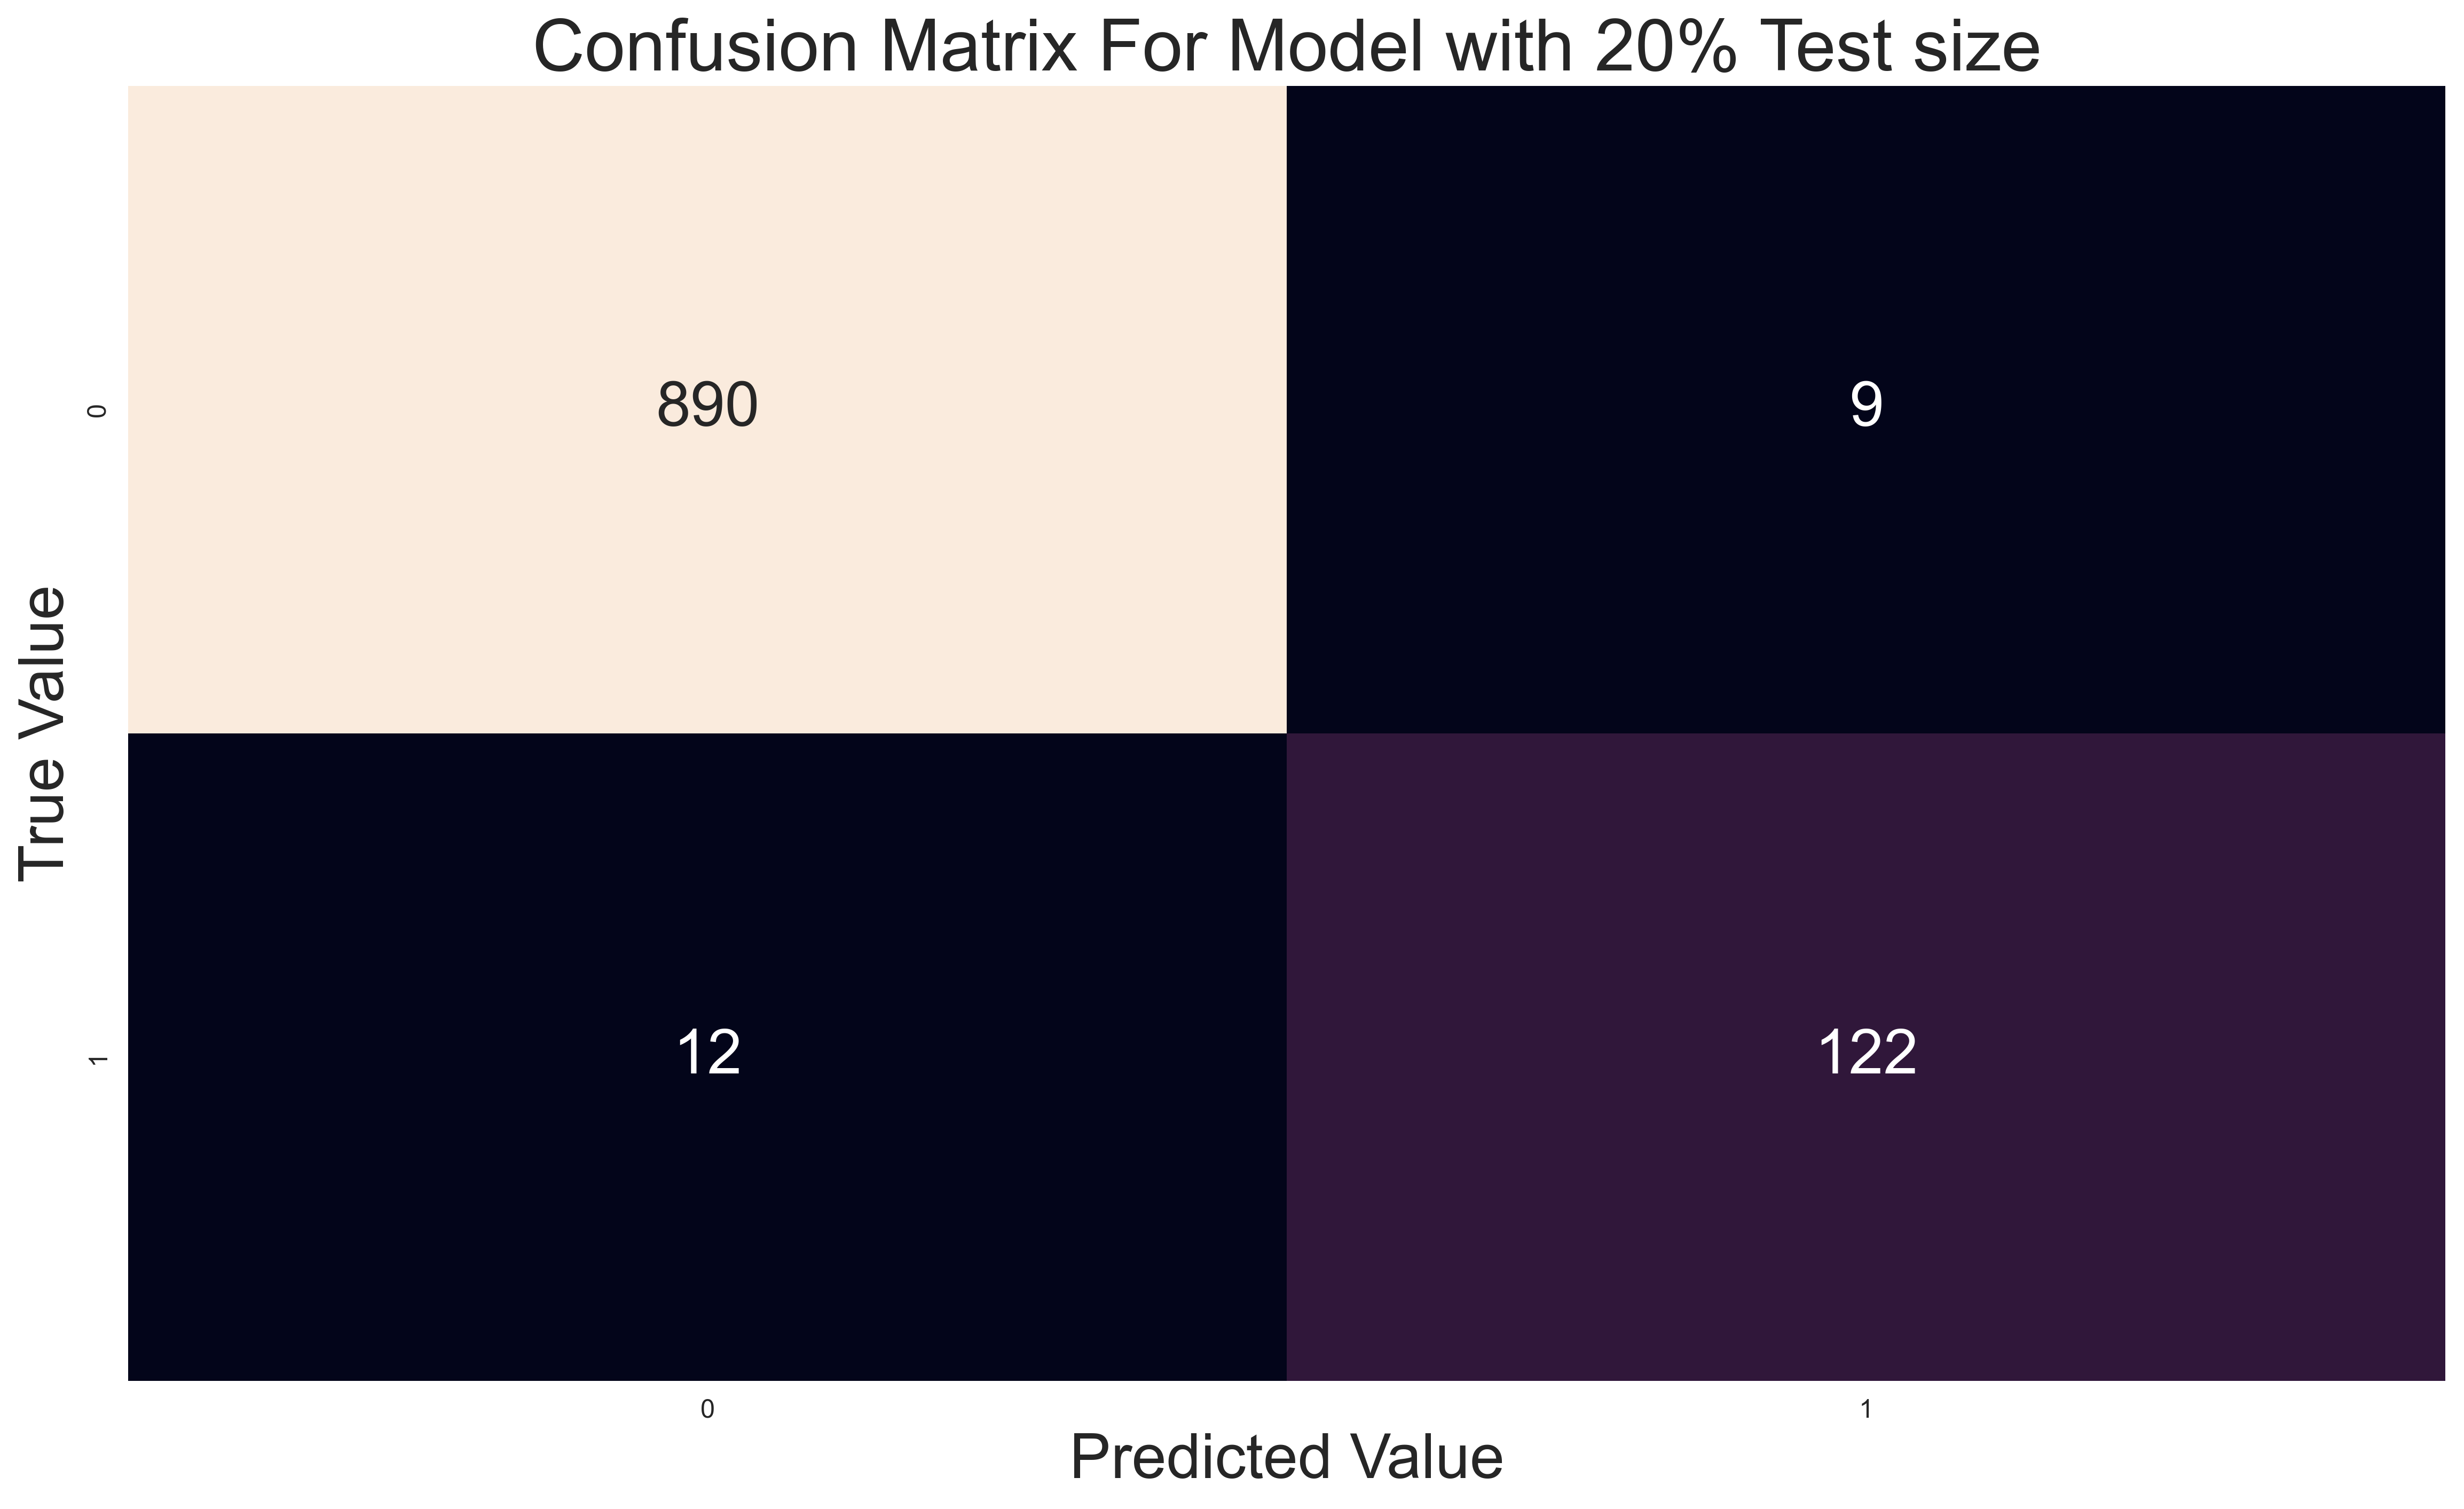

33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step
Evaluating  ES Model with 20% Test size :-
Model Accuracy   :  0.9
Model precision  :  0.58
Model recall     :  0.77
Model f1_score   :  0.66
Printing Confusion Matrix :
              precision    recall  f1-score   support

           0       0.96      0.92      0.94       899
           1       0.58      0.77      0.66       134

    accuracy                           0.90      1033
   macro avg       0.77      0.84      0.80      1033
weighted avg       0.91      0.90      0.90      1033
 

Printing Confusion Matrix :
[[824  75]
 [ 31 103]]


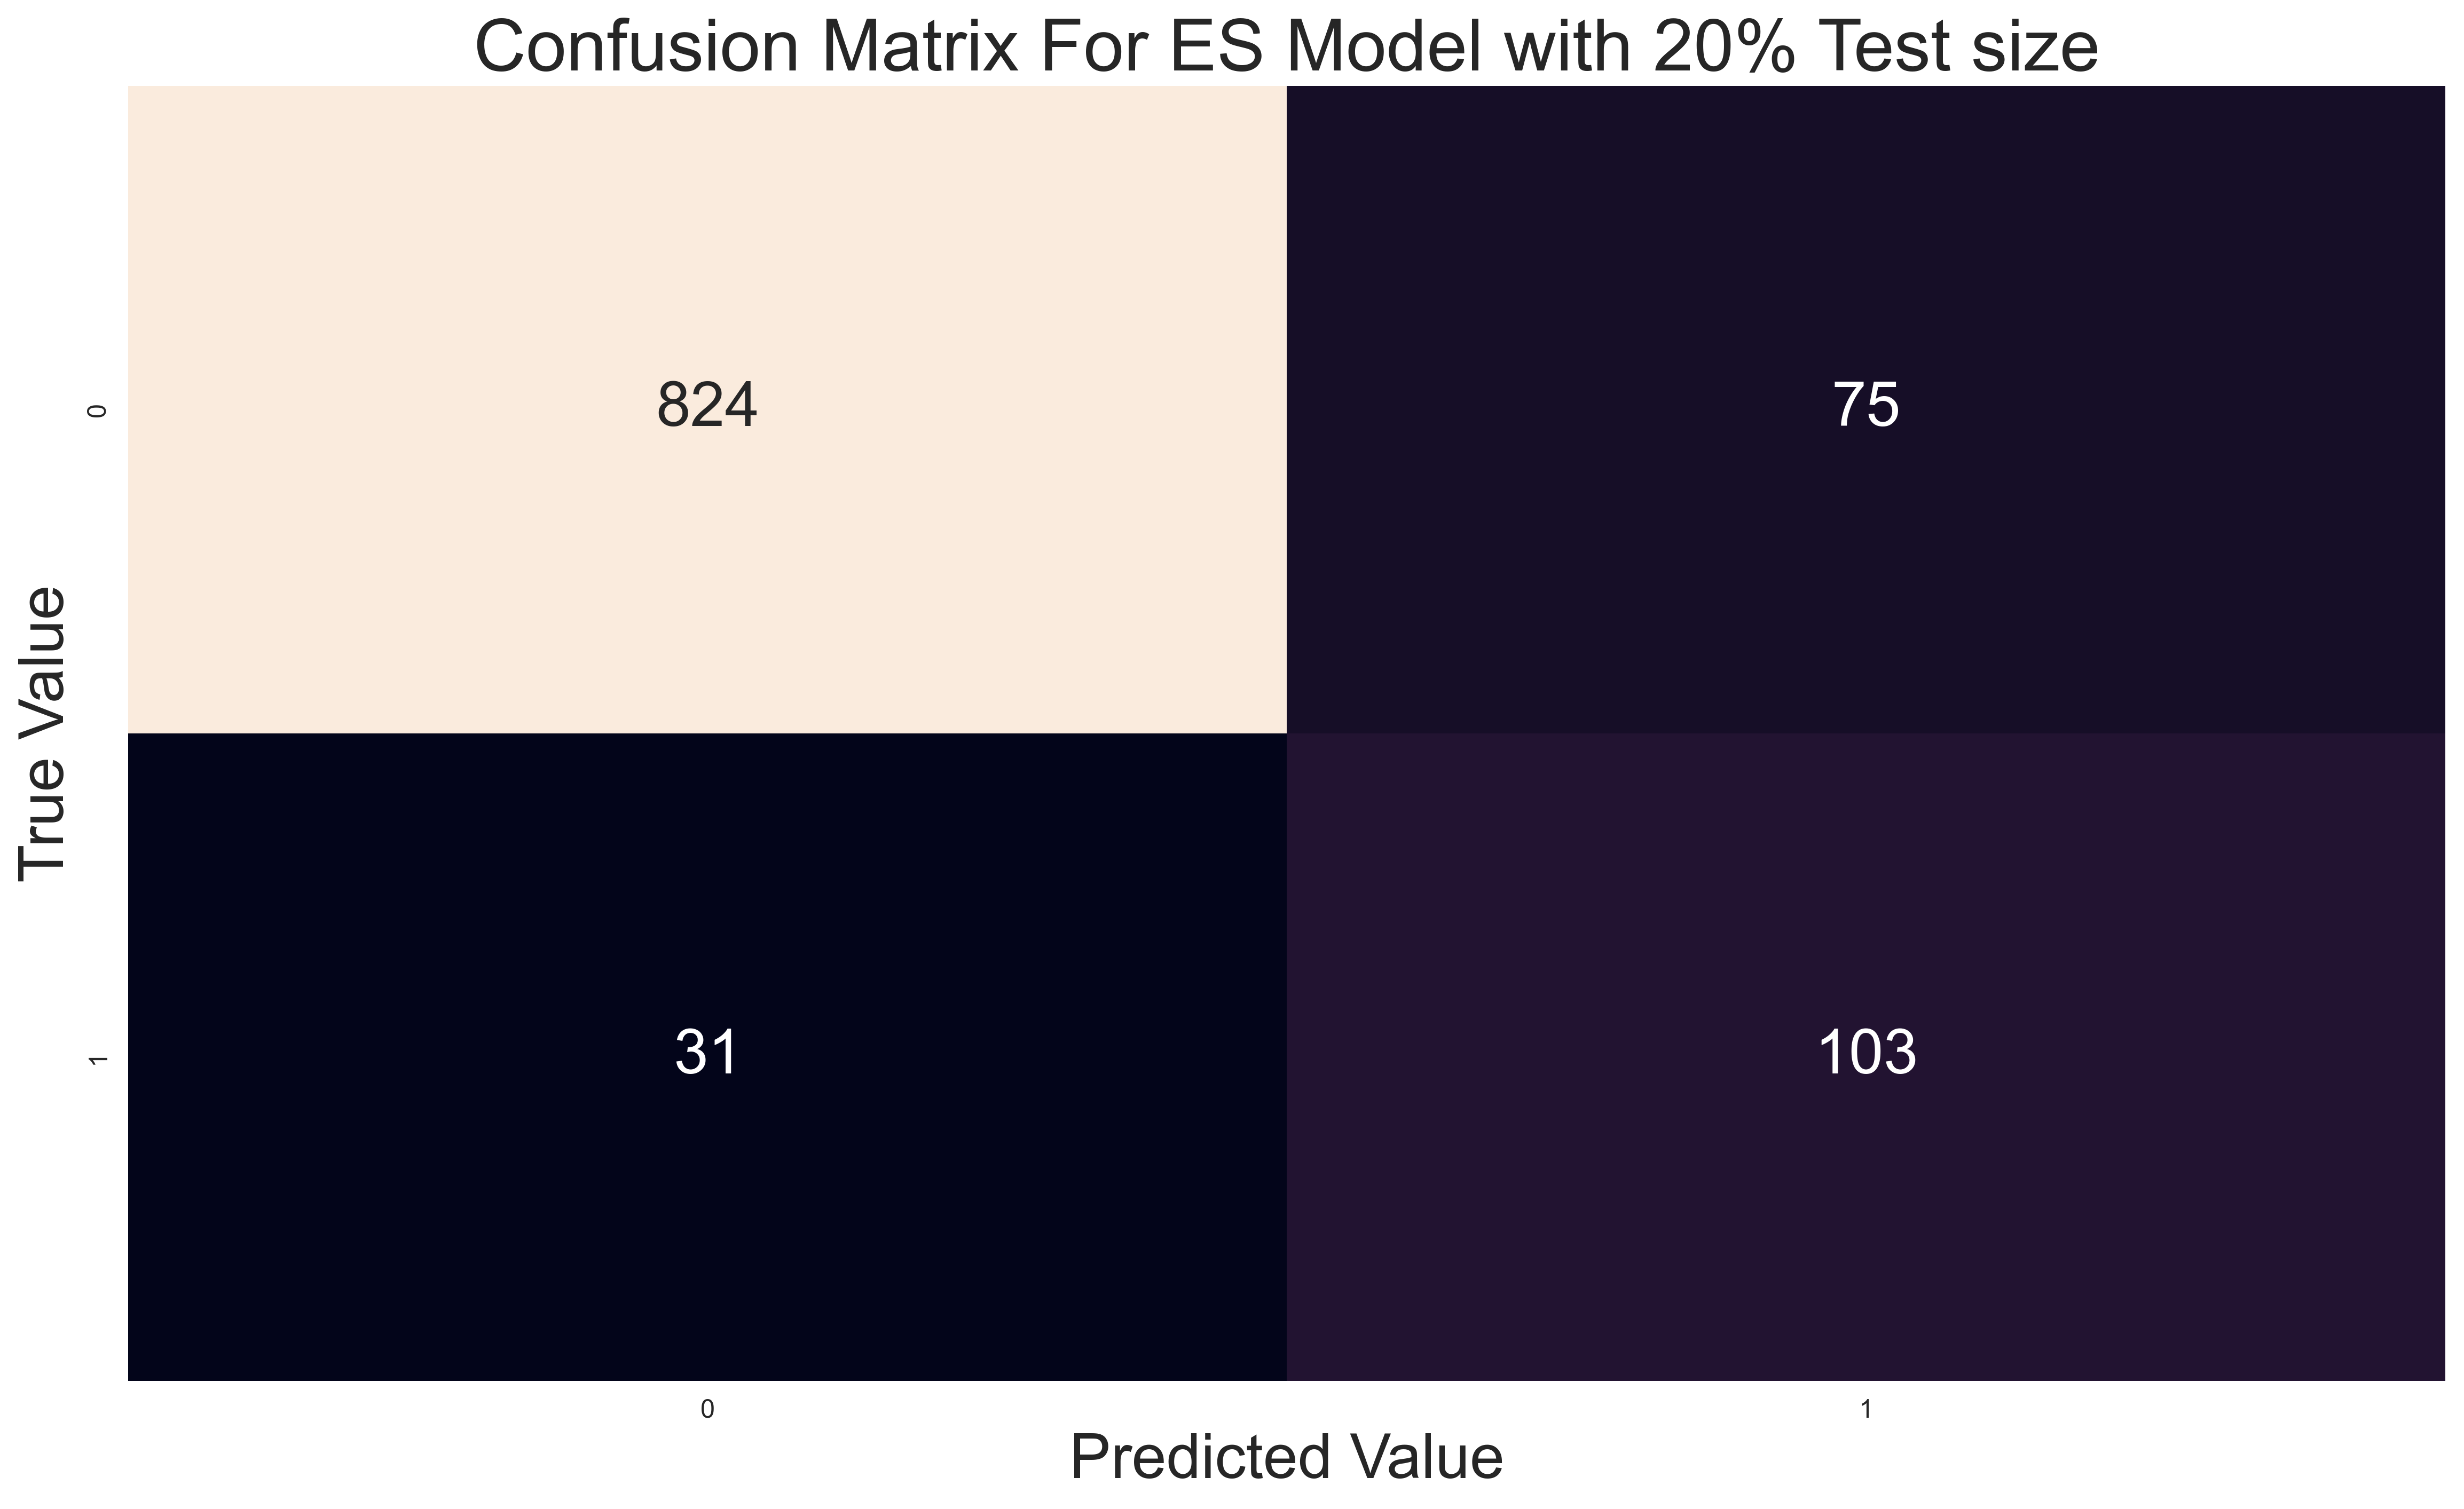

33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step
Evaluating  DOL Model with 20% Test size :-
Model Accuracy   :  0.97
Model precision  :  0.91
Model recall     :  0.9
Model f1_score   :  0.9
Printing Confusion Matrix :
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       899
           1       0.91      0.90      0.90       134

    accuracy                           0.97      1033
   macro avg       0.95      0.94      0.94      1033
weighted avg       0.97      0.97      0.97      1033
 

Printing Confusion Matrix :
[[887  12]
 [ 14 120]]


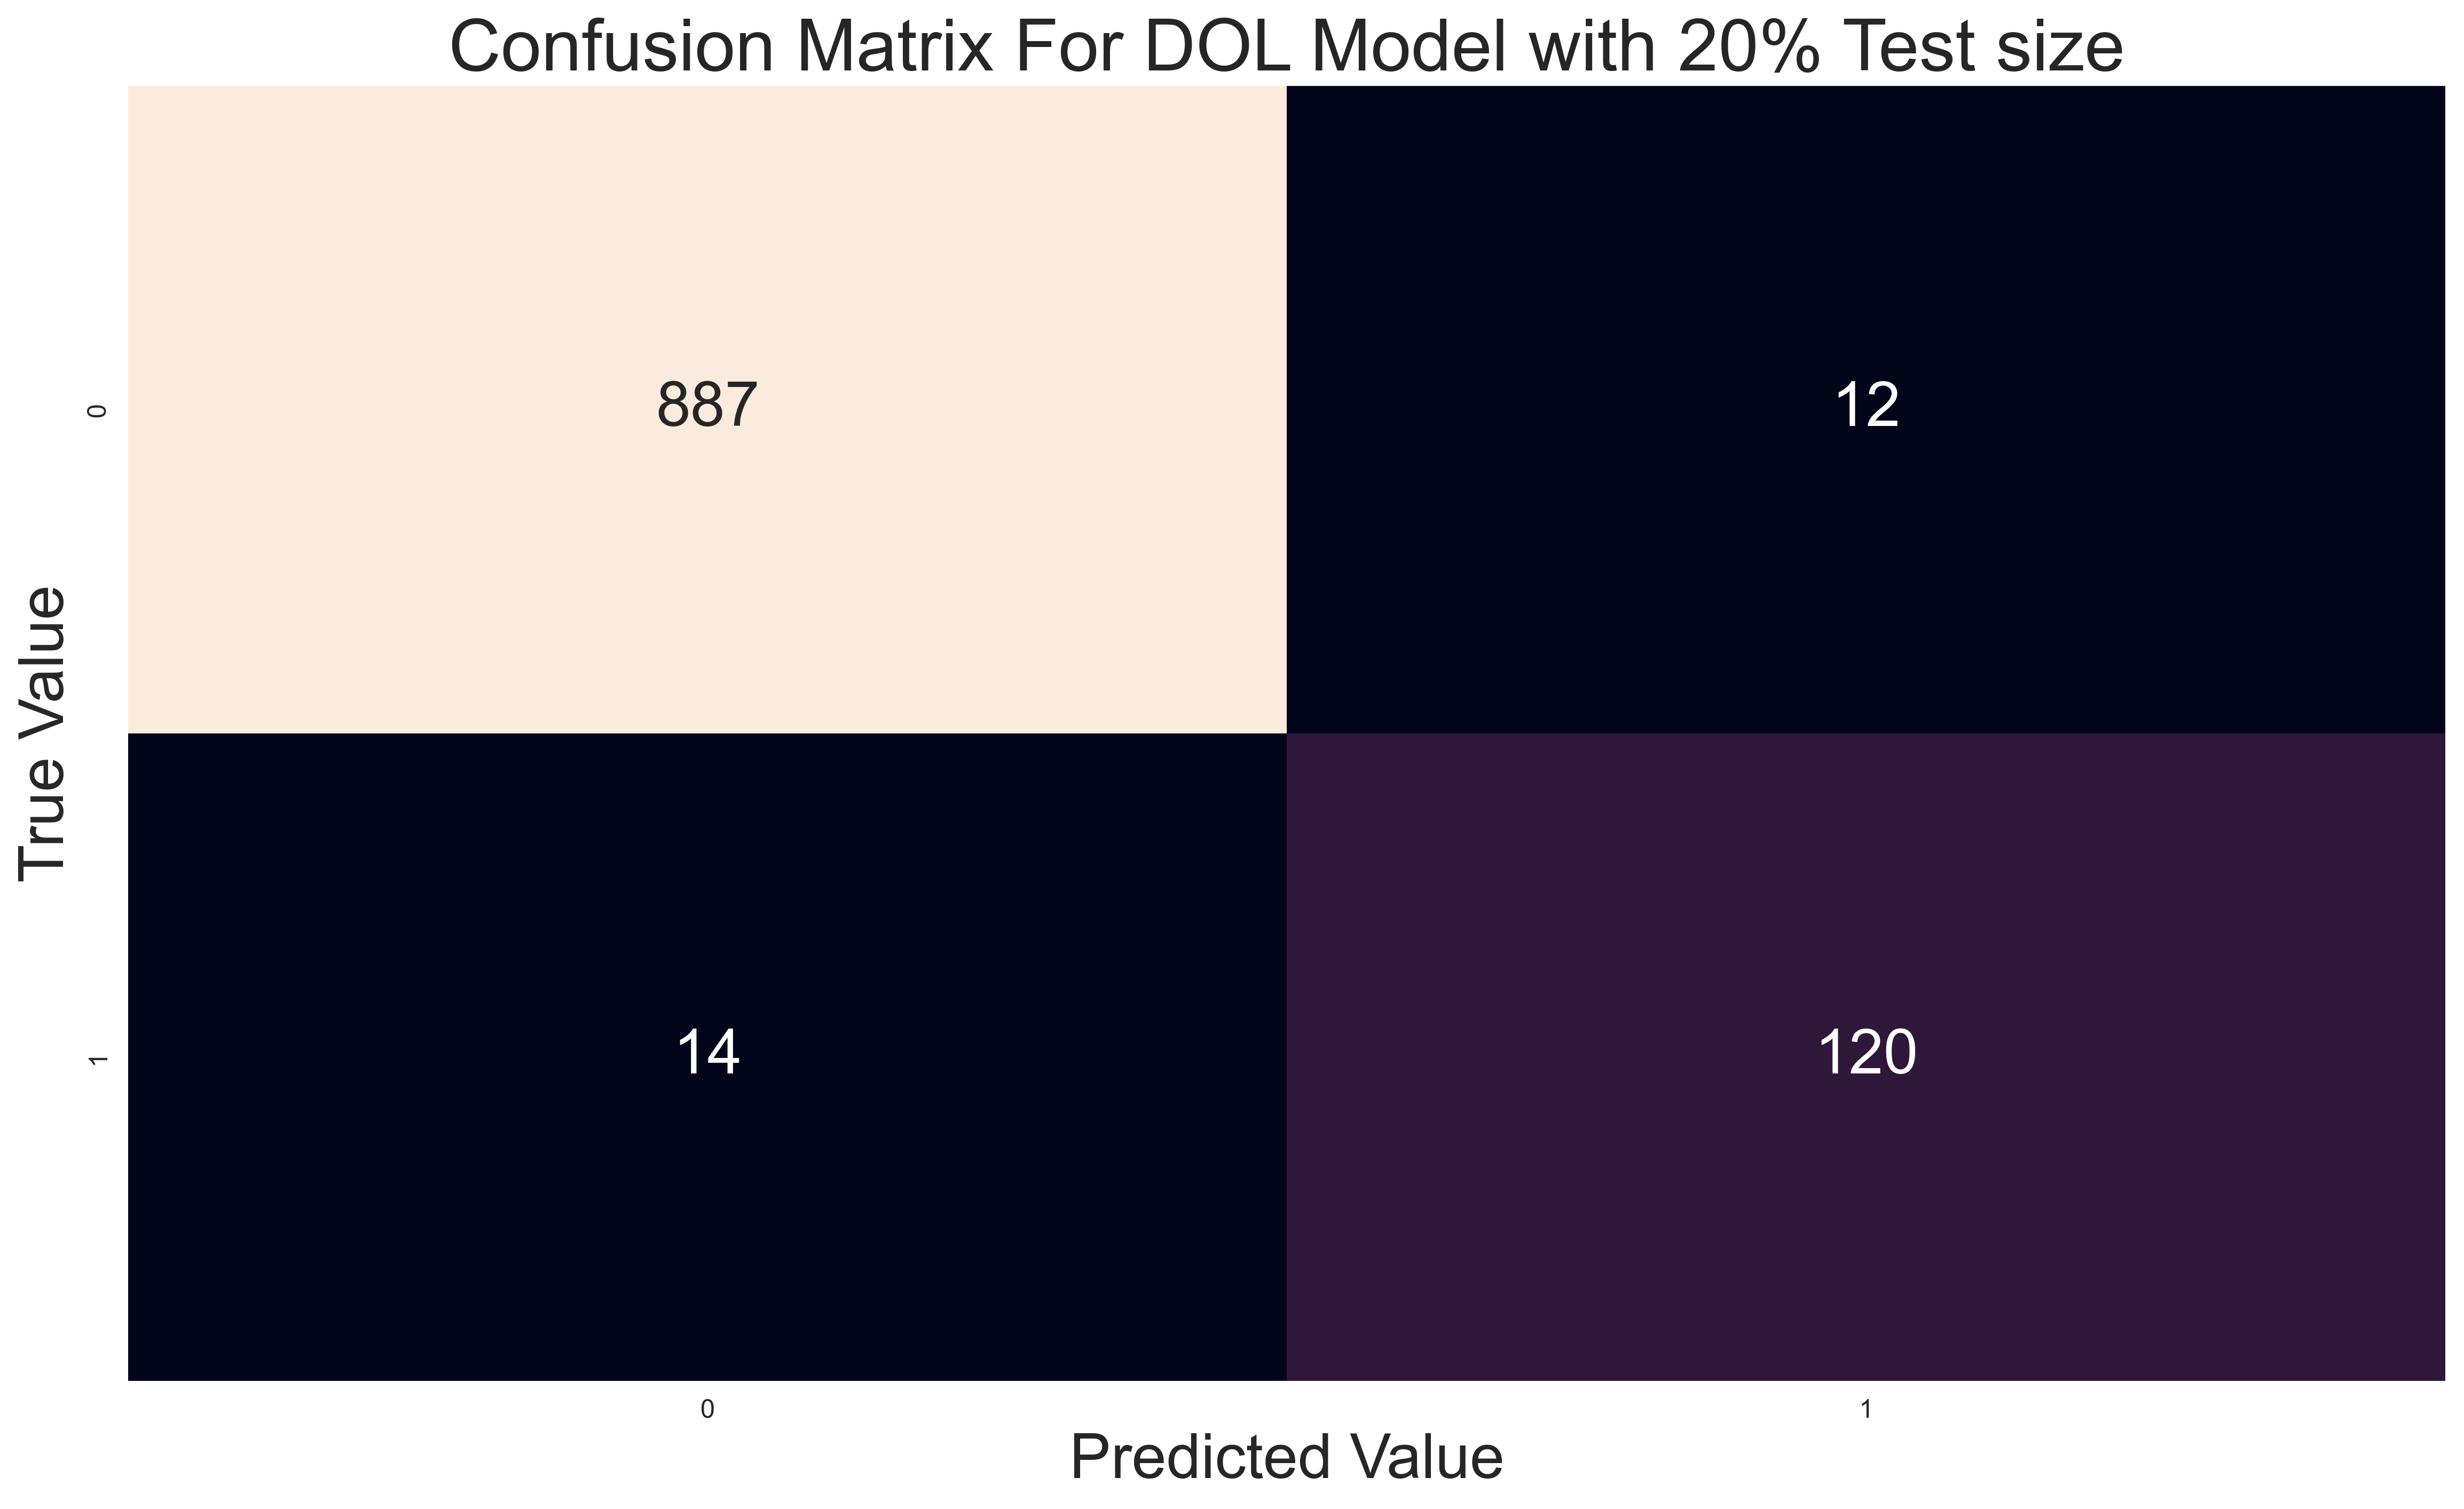

In [80]:
model = [def_model, es_model, dol_model, es_dol_model]
model_name = ['Model with 30% Test size','Model with 20% Test size', 'ES Model with 20% Test size', 'DOL Model with 20% Test size', 'ES & DOL Model with 20% Test size']

for i in range(len(model)):

    yp = model[i].predict(xtest)
    ypred = []

    for j in yp:
        if j > 0.5:
            ypred.append(1)
        else:
            ypred.append(0)

    print("Evaluating ", model_name[i], ":-")
    print("Model Accuracy   : ", round(accuracy_score(ytest, ypred), 2))
    print("Model precision  : ", round(precision_score(ytest, ypred), 2))
    print("Model recall     : ", round(recall_score(ytest, ypred), 2))
    print("Model f1_score   : ", round(f1_score(ytest, ypred), 2))
    print('Printing Confusion Matrix :')
    print(classification_report(ytest, ypred), '\n')
    print('Printing Confusion Matrix :')
    print(confusion_matrix(ytest, ypred))
    sns.heatmap(confusion_matrix(ytest, ypred), annot= True, fmt='d', cbar=False, annot_kws={'size':24})
    plt.title('Confusion Matrix For '+ model_name[i], fontsize=28)
    plt.xlabel('Predicted Value', fontsize=24)
    plt.ylabel('True Value', fontsize=24)
    plt.show()

### Ploting Accuracy VS Val-Accuracy For All Model

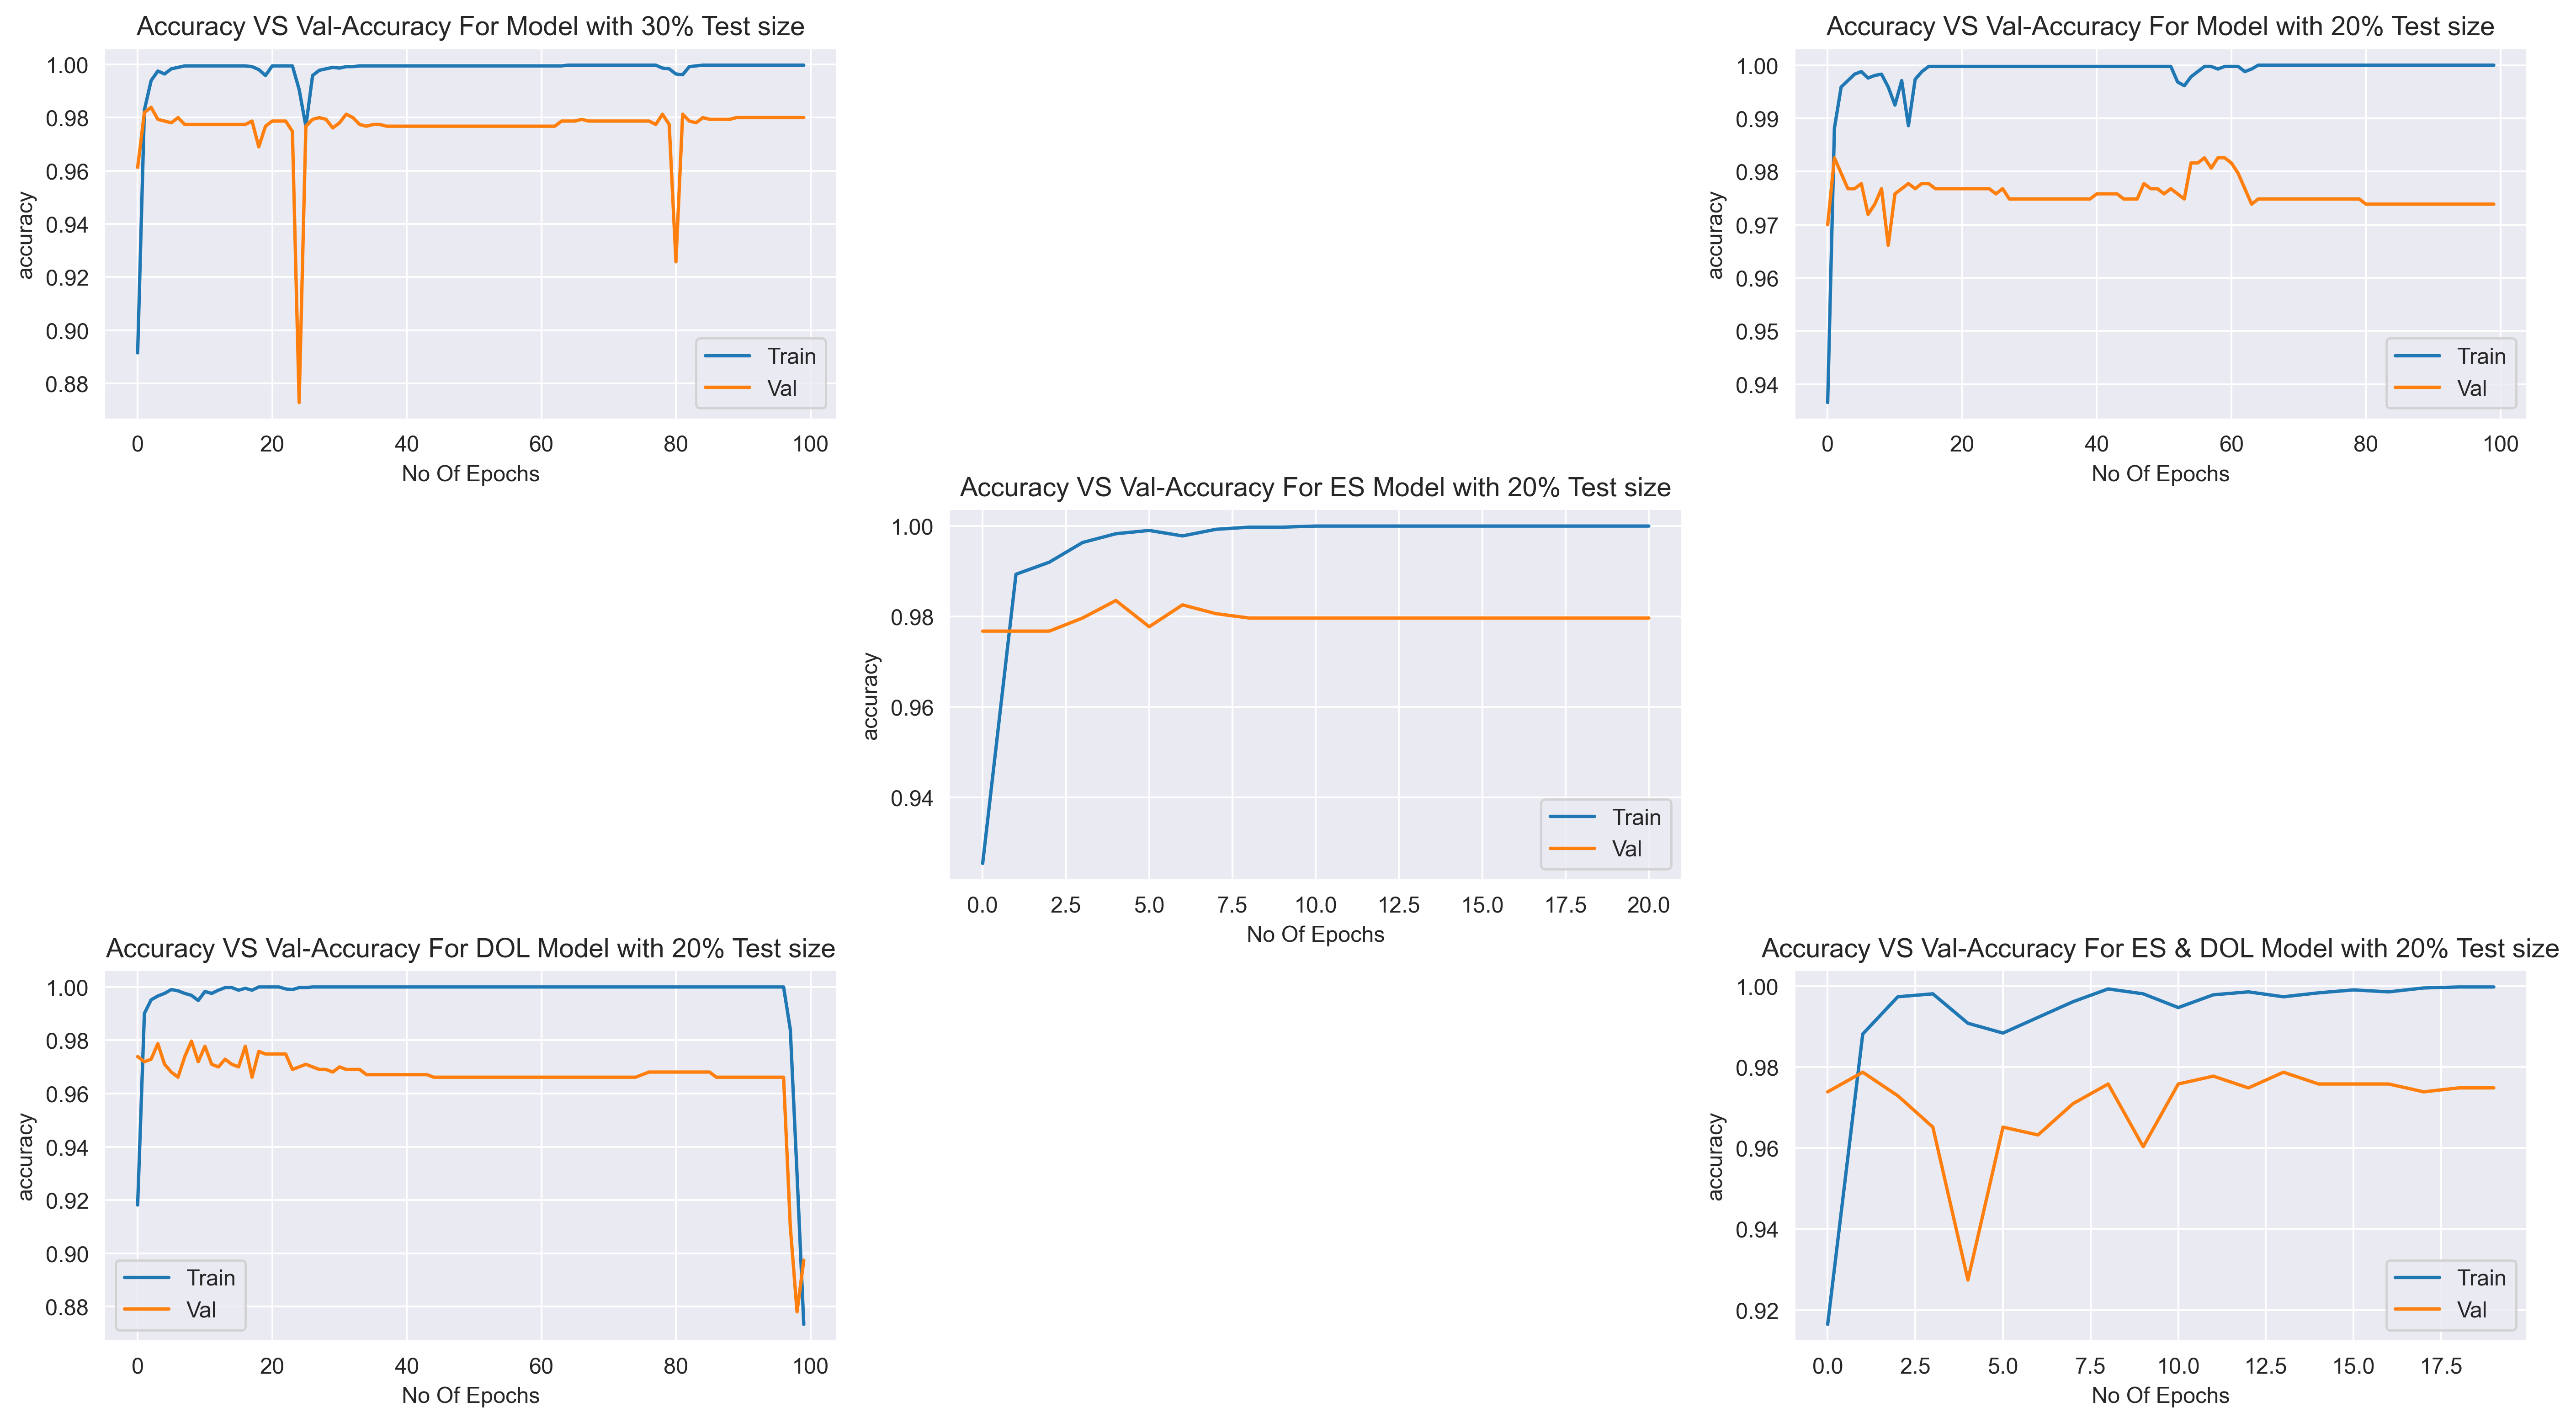

In [81]:
fig, ax = plt.subplots(3,3)


ax[0][0].set_title('Accuracy VS Val-Accuracy For Model with 30% Test size')
ax[0][0].set_xlabel('No Of Epochs')
ax[0][0].set_ylabel('accuracy')
sns.lineplot(history.history['accuracy'], label='Train', ax=ax[0][0])
sns.lineplot(history.history['val_accuracy'], label='Val', ax=ax[0][0])

fig.delaxes(ax[0][1])

ax[0][2].set_title('Accuracy VS Val-Accuracy For Model with 20% Test size')
ax[0][2].set_xlabel('No Of Epochs')
ax[0][2].set_ylabel('accuracy')
sns.lineplot(def_history.history['accuracy'], label='Train', ax=ax[0][2])
sns.lineplot(def_history.history['val_accuracy'], label='Val', ax=ax[0][2])

fig.delaxes(ax[1][0])

ax[1][1].set_title('Accuracy VS Val-Accuracy For ES Model with 20% Test size')
ax[1][1].set_xlabel('No Of Epochs')
ax[1][1].set_ylabel('accuracy')
sns.lineplot(es_history.history['accuracy'], label='Train', ax=ax[1][1])
sns.lineplot(es_history.history['val_accuracy'], label='Val', ax=ax[1][1])

fig.delaxes(ax[1][2])

ax[2][0].set_title('Accuracy VS Val-Accuracy For DOL Model with 20% Test size')
ax[2][0].set_xlabel('No Of Epochs')
ax[2][0].set_ylabel('accuracy')
sns.lineplot(dol_history.history['accuracy'], label='Train', ax=ax[2][0])
sns.lineplot(dol_history.history['val_accuracy'], label='Val', ax=ax[2][0])

fig.delaxes(ax[2][1])


ax[2][2].set_title('Accuracy VS Val-Accuracy For ES & DOL Model with 20% Test size')
ax[2][2].set_xlabel('No Of Epochs')
ax[2][2].set_ylabel('accuracy')
sns.lineplot(es_dol_history.history['accuracy'], label='Train', ax=ax[2][2])
sns.lineplot(es_dol_history.history['val_accuracy'], label='Val', ax=ax[2][2])


plt.tight_layout()
plt.show()

### Ploting Loss VS Val-Loss For All Model

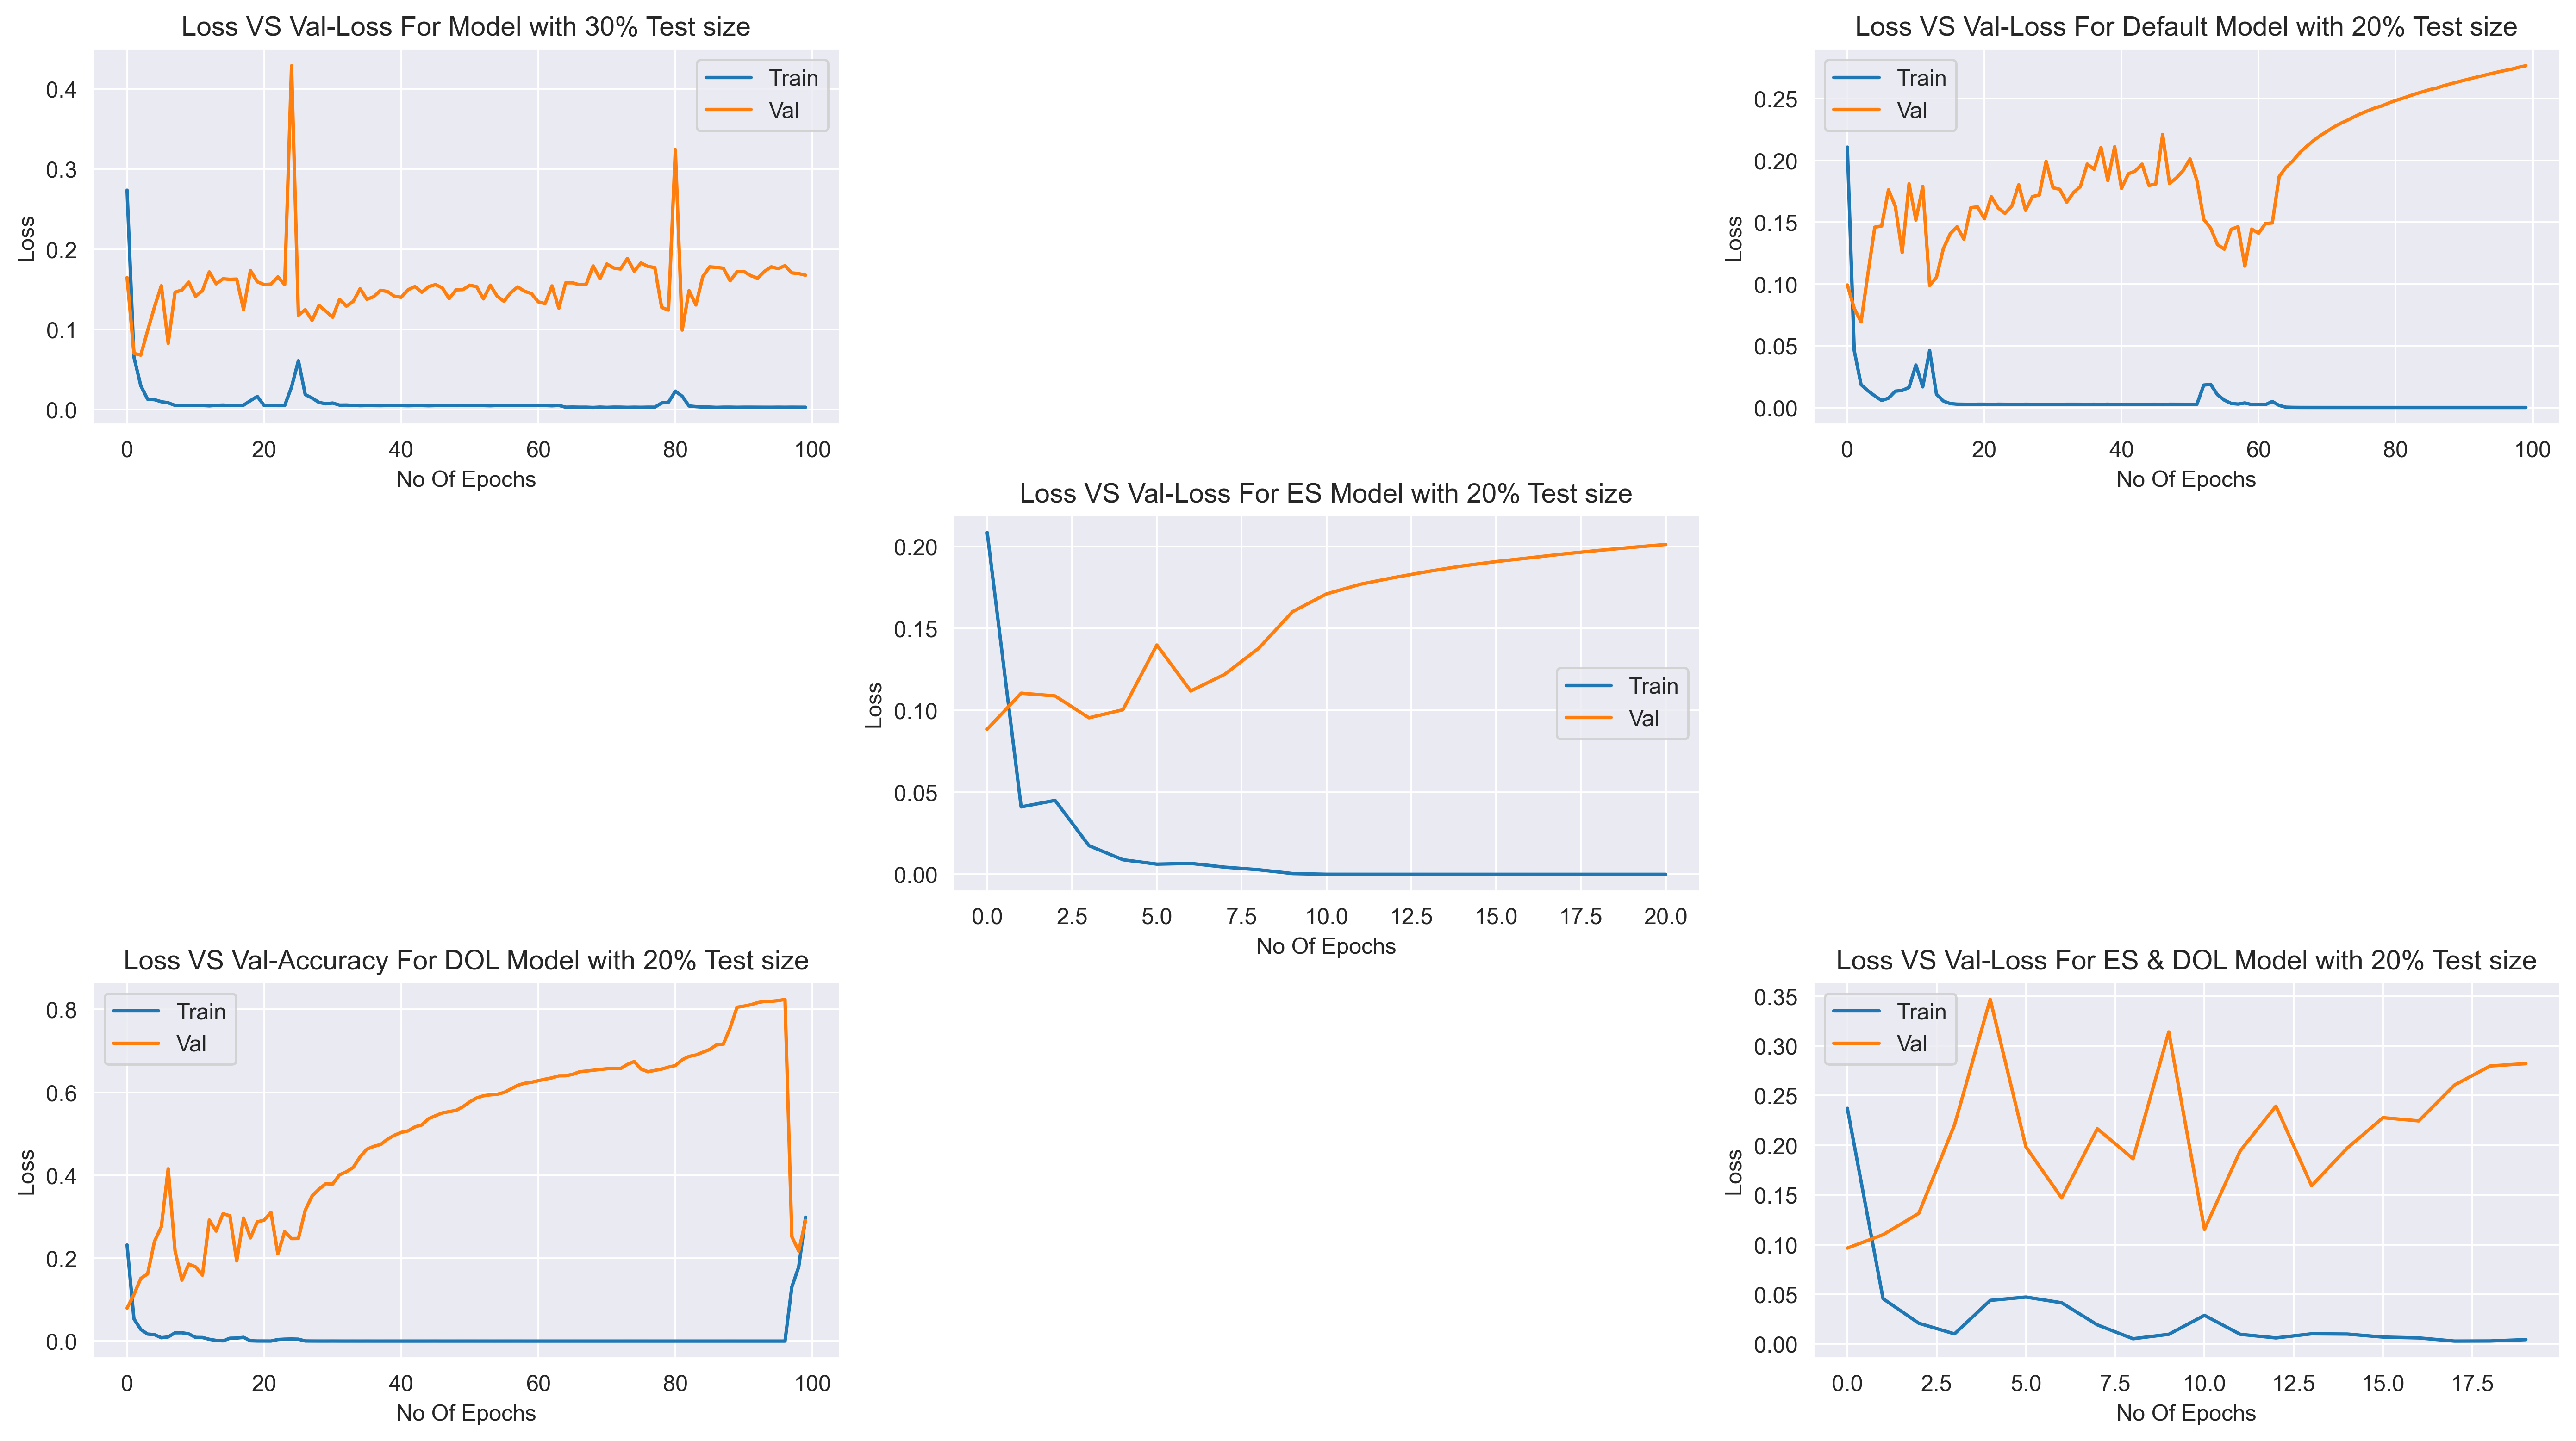

In [84]:
fig, ax = plt.subplots(3,3)

ax[0][0].set_title('Loss VS Val-Loss For Model with 30% Test size')
ax[0][0].set_xlabel('No Of Epochs')
ax[0][0].set_ylabel('Loss')
sns.lineplot(history.history['loss'], label='Train', ax=ax[0][0])
sns.lineplot(history.history['val_loss'], label='Val', ax=ax[0][0])

fig.delaxes(ax[0][1])

ax[0][2].set_title('Loss VS Val-Loss For Default Model with 20% Test size')
ax[0][2].set_xlabel('No Of Epochs')
ax[0][2].set_ylabel('Loss')
sns.lineplot(def_history.history['loss'], label='Train', ax=ax[0][2])
sns.lineplot(def_history.history['val_loss'], label='Val', ax=ax[0][2])

fig.delaxes(ax[1][0])

ax[1][1].set_title('Loss VS Val-Loss For ES Model with 20% Test size')
ax[1][1].set_xlabel('No Of Epochs')
ax[1][1].set_ylabel('Loss')
sns.lineplot(es_history.history['loss'], label='Train', ax=ax[1][1])
sns.lineplot(es_history.history['val_loss'], label='Val', ax=ax[1][1])

fig.delaxes(ax[1][2])

ax[2][0].set_title('Loss VS Val-Accuracy For DOL Model with 20% Test size')
ax[2][0].set_xlabel('No Of Epochs')
ax[2][0].set_ylabel('Loss')
sns.lineplot(dol_history.history['loss'], label='Train', ax=ax[2][0])
sns.lineplot(dol_history.history['val_loss'], label='Val', ax=ax[2][0])

fig.delaxes(ax[2][1])

ax[2][2].set_title('Loss VS Val-Loss For ES & DOL Model with 20% Test size')
ax[2][2].set_xlabel('No Of Epochs')
ax[2][2].set_ylabel('Loss')
sns.lineplot(es_dol_history.history['loss'], label='Train', ax=ax[2][2])
sns.lineplot(es_dol_history.history['val_loss'], label='Val', ax=ax[2][2])


plt.tight_layout()
plt.show()